## Independent Study Week 8 - Data cleaning test (Oct 13, 2021)

Using the data of 3 province - Incheon, Busan, Jeju

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
td = pd.read_csv('testing11.csv', thousands=',', skiprows=2)
td.head()

,province,district,category,sub_category,label,tourist_spot_kor,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,...,2020-Jun,2020-Jul,2020-Aug,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar
0,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street",������ ���繮ȭ�ǰŸ�,"Open Port Street, Historical and Cultural Street",Local,88742.0,111795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street",������ ���繮ȭ�ǰŸ�,"Open Port Street, Historical and Cultural Street",Total,88742.0,111795.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",���ǵ�,Muuido,Local,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",���ǵ�,Muuido,Total,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incheon Metropolitan City,Jung-gu,outdoor,Social,"Outdoor, Social, Street",��ȭ�ǰŸ�,Cultural Street,Local,190833.0,282460.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Remove the tourist_spot_kor**

In [3]:
td2 = td.drop(columns='tourist_spot_kor')
td2.head()

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Jun,2020-Jul,2020-Aug,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar
0,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street","Open Port Street, Historical and Cultural Street",Local,88742.0,111795.0,121018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street","Open Port Street, Historical and Cultural Street",Total,88742.0,111795.0,121018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",Muuido,Local,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",Muuido,Total,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Incheon Metropolitan City,Jung-gu,outdoor,Social,"Outdoor, Social, Street",Cultural Street,Local,190833.0,282460.0,310400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**only select the total number of tourists in each spot**

In [4]:
td3 = td2[(td2.foreigner_local == 'Total')]
td3.head()

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Jun,2020-Jul,2020-Aug,2020-Sep,2020-Oct,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar
1,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street","Open Port Street, Historical and Cultural Street",Total,88742.0,111795.0,121018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",Muuido,Total,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Incheon Metropolitan City,Jung-gu,outdoor,Social,"Outdoor, Social, Street",Cultural Street,Total,190833.0,282460.0,310400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Incheon Metropolitan City,Jung-gu,outdoor,Industrial,"Outdoor, Industrial, Port",Bukseong Port,Total,1362.0,1228.0,8649.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Incheon Metropolitan City,Jung-gu,indoor,Social,"Indoor, Social, Museum",Museum of Island Story,Total,NaN,NaN,NaN,...,11167.0,13870.0,15287.0,12723.0,0.0,0.0,0.0,0.0,0.0,0.0


### Making 'sum' columns - there is an error message. Is this the right way to make columns?

In [5]:
td3['2016_sum'] = td3['2016-Jan'] + td3['2016-Feb'] + td3['2016-Mar'] + td3['2016-Apr'] + td3['2016-May'] + td3['2016-Jun'] + td3['2016-Jul'] + td3['2016-Aug'] + td3['2016-Sep'] + td3['2016-Oct'] + td3['2016-Nov'] + td3['2016-Dec']
td3['2017_sum'] = td3['2017-Jan'] + td3['2017-Feb'] + td3['2017-Mar'] + td3['2017-Apr'] + td3['2017-May'] + td3['2017-Jun'] + td3['2017-Jul'] + td3['2017-Aug'] + td3['2017-Sep'] + td3['2017-Oct'] + td3['2017-Nov'] + td3['2017-Dec']
td3['2018_sum'] = td3['2018-Jan'] + td3['2018-Feb'] + td3['2018-Mar'] + td3['2018-Apr'] + td3['2018-May'] + td3['2018-Jun'] + td3['2018-Jul'] + td3['2018-Aug'] + td3['2018-Sep'] + td3['2018-Oct'] + td3['2018-Nov'] + td3['2018-Dec']
td3['2019_sum'] = td3['2019-Jan'] + td3['2019-Feb'] + td3['2019-Mar'] + td3['2019-Apr'] + td3['2019-May'] + td3['2019-Jun'] + td3['2019-Jul'] + td3['2019-Aug'] + td3['2019-Sep'] + td3['2019-Oct'] + td3['2019-Nov'] + td3['2019-Dec']
td3['2020_sum'] = td3['2020-Jan'] + td3['2020-Feb'] + td3['2020-Mar'] + td3['2020-Apr'] + td3['2020-May'] + td3['2020-Jun'] + td3['2020-Jul'] + td3['2020-Aug'] + td3['2020-Sep'] + td3['2020-Oct'] + td3['2020-Nov'] + td3['2020-Dec']
td3.head()

C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HAESOOK MA\anaconda3\envs\DataViz\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,province,district,category,sub_category,label,tourist_spot_eng,foreigner_local,2012-Jan,2012-Feb,2012-Mar,...,2020-Nov,2020-Dec,2021-Jan,2021-Feb,2021-Mar,2016_sum,2017_sum,2018_sum,2019_sum,2020_sum
1,Incheon Metropolitan City,Jung-gu,outdoor,History,"Outdoor, History, Street","Open Port Street, Historical and Cultural Street",Total,88742.0,111795.0,121018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Incheon Metropolitan City,Jung-gu,outdoor,Nature,"Outdoor, Nature, Island",Muuido,Total,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,375715.0,375915.0,323228.0,NaN,NaN
5,Incheon Metropolitan City,Jung-gu,outdoor,Social,"Outdoor, Social, Street",Cultural Street,Total,190833.0,282460.0,310400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Incheon Metropolitan City,Jung-gu,outdoor,Industrial,"Outdoor, Industrial, Port",Bukseong Port,Total,1362.0,1228.0,8649.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Incheon Metropolitan City,Jung-gu,indoor,Social,"Indoor, Social, Museum",Museum of Island Story,Total,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,101945.0


In [6]:
td4 = td3[['tourist_spot_eng', 'sub_category', '2016_sum', '2017_sum', '2018_sum', '2019_sum', '2020_sum']].sort_values('2020_sum', ascending=False)
td4.head(20)

,tourist_spot_eng,sub_category,2016_sum,2017_sum,2018_sum,2019_sum,2020_sum
293,Gamcheon Culture Village,Social,1841323.0,2050297.0,2570521.0,3082289.0,1133300.0
167,Ganghwa Nadeulgil Course #1 ~ #8,Nature,225267.0,241718.0,474891.0,366964.0,770000.0
231,Songdo Cloud Trails,Social,NaN,NaN,NaN,1839121.0,763991.0
453,Cheonjiyeon Waterfall,Nature,1989344.0,1807671.0,1394942.0,1323545.0,715436.0
113,Sorae Railway Bridge,Industrial,NaN,NaN,708042.0,720813.0,701425.0
375,Hallasan National Park,Nature,1065898.0,1001437.0,888969.0,848279.0,699117.0
336,Bijarim Forest,Nature,808003.0,896555.0,867511.0,799825.0,607945.0
411,Seongsan Ilchulbong,Nature,3169913.0,2158878.0,1822660.0,1707913.0,560050.0
351,Jeolmul Natural Recreation Forest,Nature,754778.0,814242.0,811402.0,729749.0,545323.0
447,Jusangjeollidae,Nature,1708300.0,1523828.0,1305142.0,1169852.0,536986.0


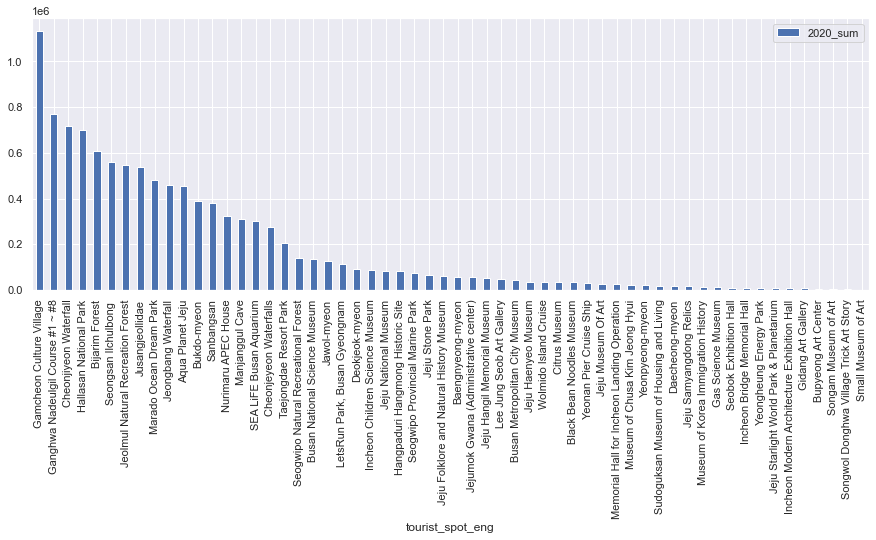

In [35]:
td4.dropna().plot(x='tourist_spot_eng', y='2020_sum', kind='bar');

In [7]:
td5 = td4.groupby('sub_category').agg('sum')
td5

,2016_sum,2017_sum,2018_sum,2019_sum,2020_sum
sub_category,,,,,
History,1862667.0,2219083.0,2614252.0,2717661.0,631138.0
Industrial,0.0,0.0,708042.0,720813.0,701425.0
Nature,15390709.0,14873083.0,12659901.0,11602486.0,7186525.0
Recreation,3152857.0,2680455.0,2481832.0,2473780.0,1069479.0
Social,9202993.0,10831014.0,12466345.0,16605287.0,5060899.0


In [8]:
td5.reset_index(inplace=True)
td5

,sub_category,2016_sum,2017_sum,2018_sum,2019_sum,2020_sum
0,History,1862667.0,2219083.0,2614252.0,2717661.0,631138.0
1,Industrial,0.0,0.0,708042.0,720813.0,701425.0
2,Nature,15390709.0,14873083.0,12659901.0,11602486.0,7186525.0
3,Recreation,3152857.0,2680455.0,2481832.0,2473780.0,1069479.0
4,Social,9202993.0,10831014.0,12466345.0,16605287.0,5060899.0


In [9]:
td5.set_index('sub_category', inplace=True)
td5

,2016_sum,2017_sum,2018_sum,2019_sum,2020_sum
sub_category,,,,,
History,1862667.0,2219083.0,2614252.0,2717661.0,631138.0
Industrial,0.0,0.0,708042.0,720813.0,701425.0
Nature,15390709.0,14873083.0,12659901.0,11602486.0,7186525.0
Recreation,3152857.0,2680455.0,2481832.0,2473780.0,1069479.0
Social,9202993.0,10831014.0,12466345.0,16605287.0,5060899.0


In [10]:
td6 = td5.transpose()
td6

sub_category,History,Industrial,Nature,Recreation,Social
2016_sum,1862667.0,0.0,15390709.0,3152857.0,9202993.0
2017_sum,2219083.0,0.0,14873083.0,2680455.0,10831014.0
2018_sum,2614252.0,708042.0,12659901.0,2481832.0,12466345.0
2019_sum,2717661.0,720813.0,11602486.0,2473780.0,16605287.0
2020_sum,631138.0,701425.0,7186525.0,1069479.0,5060899.0


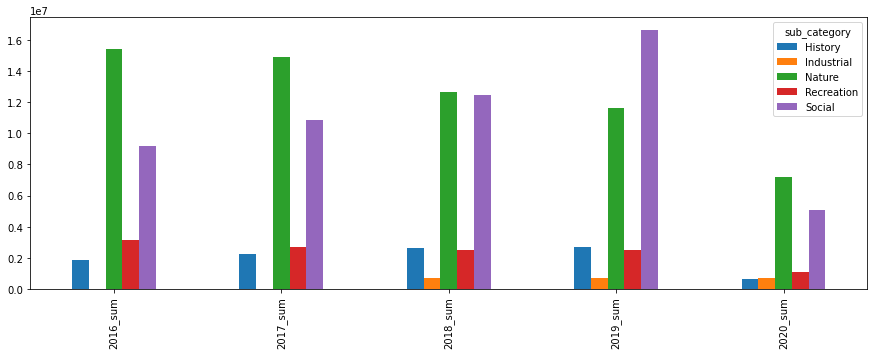

In [15]:
td6.plot(figsize = (15,5), kind='bar');

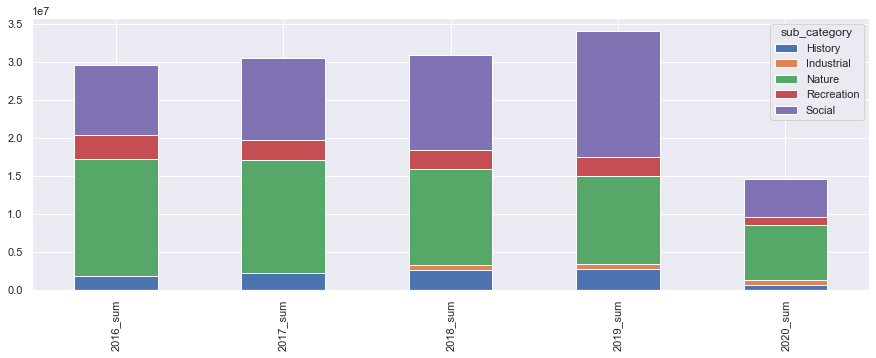

In [41]:
td6.plot(figsize = (15,5), kind='bar', stacked = True);

- **Can we change the name of the column 'sub_category' to 'year'?**
- **Not possible to choose the column ['sub_category']. Why?**

### Is it possible to make the fowlloing table using the data we have?

melt() function? pivot_table()?

In [27]:
i_total_number_grouped2

,Year,Sub_category,sum
0,2017,History,3465657
1,2017,Industrial,0
2,2017,Nature,27499754
3,2017,Recreation,3193688
4,2017,Social,21038025
5,2018,History,3958069
6,2018,Industrial,708042
7,2018,Nature,23186105
8,2018,Recreation,2732392
9,2018,Social,23585199


### 2017-2021.March Monthly Total by Category

In [36]:
# Chart will be added.

### 2017-2021.March Monthly Total by Sub_category

In [37]:
# Chart will be added.

# Making a barplot for sub_category (Year Data)

Data was sorted by excel for test.

In [23]:
i_total_number = pd.read_csv('total_number1.csv')
i_total_number.head()

,Year,Sub_category,Incheon,Busan,Jeju
0,2017,History,1082636,356800,2026221
1,2017,Industrial,0,0,0
2,2017,Nature,1538974,2166254,23794526
3,2017,Recreation,733218,0,2460470
4,2017,Social,2752078,13796176,4489771


In [24]:
i_total_number.groupby(['Year','Sub_category']).agg('sum')

Incheon     Busan      Jeju
Year Sub_category                             
2017 History       1082636    356800   2026221
     Industrial          0         0         0
     Nature        1538974   2166254  23794526
     Recreation     733218         0   2460470
     Social        2752078  13796176   4489771
2018 History       1112318    366148   2479603
     Industrial     708042         0         0
     Nature        1557917   1703434  19924754
     Recreation     741276         0   1991116
     Social        3165878  15186658   5232663
2019 History       1202646    418592   2403507
     Industrial     720813         0         0
     Nature        1449747   1642958  18756932
     Recreation     873228         0   3061952
     Social        3281633  21864630   6883197
2020 History        254502     82394    568953
     Industrial     701425         0         0
     Nature        1687511    414450  10605530
     Recreation     201880         0   1130786
     Social         772536   6215910   3046957

In [25]:
# Make a 'sum' column 
i_total_number_grouped = i_total_number.groupby(['Year','Sub_category']).agg('sum')
i_total_number_grouped['sum'] = i_total_number_grouped['Incheon'] + i_total_number_grouped['Busan'] + i_total_number_grouped['Jeju']
i_total_number_grouped.reset_index(inplace=True)
i_total_number_grouped

# make a table only including 'Year', 'Sub_category', 'sum'
i_total_number_grouped2 = i_total_number_grouped[['Year', 'Sub_category', 'sum']]
i_total_number_grouped2

,Year,Sub_category,sum
0,2017,History,3465657
1,2017,Industrial,0
2,2017,Nature,27499754
3,2017,Recreation,3193688
4,2017,Social,21038025
5,2018,History,3958069
6,2018,Industrial,708042
7,2018,Nature,23186105
8,2018,Recreation,2732392
9,2018,Social,23585199


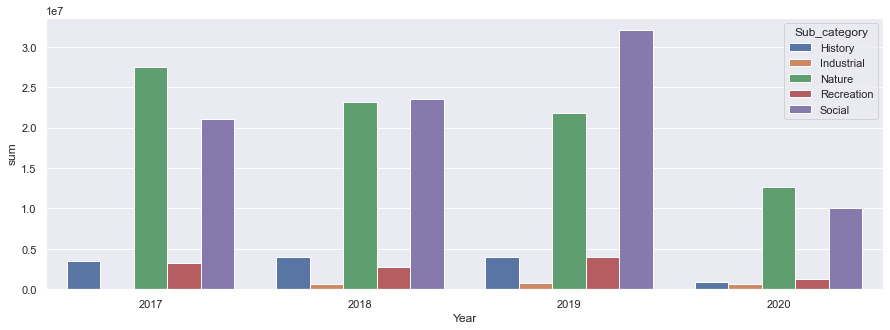

In [26]:
# barplot for sub_category
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = i_total_number_grouped2, x='Year', y='sum', hue='Sub_category');

### how to use vegalite in jupyter notebook

In [138]:
from vega import VegaLite

In [144]:
VegaLite({
    "data" : {"url" : "total_number.csv"},
    "mark":"bar",
    "encoding" : {
        "y" : {"type" : "quantitative", "field" : "Incheon"},
        "x" : {"type" : "ordinal", "field" : "Year"},
        "color" : {"type" : "nominal", "field" : "Sub_category"}
    }
})

The above code doesn't work.